<a href="https://colab.research.google.com/github/MathewsLisboa/projeto_caixaverso_logica/blob/main/projeto_mathews_lisboa_caixaverso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando o arquvio

In [ ]:
import kagglehub
import os
import csv
import pandas as pd


# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)
arquivo = os.path.join(path, "StudentsPerformance.csv")
with open(arquivo, newline='', encoding='utf-8') as f:
    reader = csv.DictReader(f)
    dados = list(reader)



Using Colab cache for faster access to the 'students-performance-in-exams' dataset.
Path to dataset files: /kaggle/input/students-performance-in-exams


In [ ]:
print("Número de observações:", len(dados))

Número de observações: 1000


In [ ]:
print("Nome das colunas", list(dados[0].keys()))

Nome das colunas ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']


# Funções e Critérios de aceintação inciais

In [ ]:
# Adiciona student_id único para cada aluno
for i, estudante in enumerate(dados):
  estudante['student_id'] = i + 1  # Começa do 1 instead of 0

In [ ]:
print("Nome das colunas", list(dados[0].keys()))

Nome das colunas ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'student_id']


In [ ]:
from collections import defaultdict

def indexar_por(registros, chave):
  idx = defaultdict(list)
  for r in registros:
    idx[r[chave]].append(r)
  return dict(idx)

## Criar um dicionário indexado por um ID

In [ ]:
alunos_por_id = {estudante['student_id']: estudante for estudante in dados}

## Função de busca por ID

In [ ]:
# Funções úteis para trabalhar com o dicionário
def buscar_aluno_por_id(alunos_dict, student_id):
    """Busca rápido de aluno por ID"""
    return alunos_dict.get(student_id,None)
def obter_alunos_por_ids(alunos_dict, ids_list):
    """Retorna subconjunto de alunos para uma lista de IDs específica"""
    return {student_id: alunos_dict[student_id] for student_id in ids_list if student_id in alunos_dict}

In [ ]:
buscar_aluno_por_id(alunos_dict, 100)

[{'gender': 'female',
  'race/ethnicity': 'group D',
  'parental level of education': "bachelor's degree",
  'lunch': 'standard',
  'test preparation course': 'none',
  'math score': '65',
  'reading score': '67',
  'writing score': '62',
  'student_id': 100}]

In [ ]:
obter_alunos_por_ids(alunos_dict,[100,101,102])

{100: [{'gender': 'female',
   'race/ethnicity': 'group D',
   'parental level of education': "bachelor's degree",
   'lunch': 'standard',
   'test preparation course': 'none',
   'math score': '65',
   'reading score': '67',
   'writing score': '62',
   'student_id': 100}],
 101: [{'gender': 'male',
   'race/ethnicity': 'group B',
   'parental level of education': 'some college',
   'lunch': 'standard',
   'test preparation course': 'none',
   'math score': '79',
   'reading score': '67',
   'writing score': '67',
   'student_id': 101}],
 102: [{'gender': 'male',
   'race/ethnicity': 'group D',
   'parental level of education': "bachelor's degree",
   'lunch': 'standard',
   'test preparation course': 'completed',
   'math score': '68',
   'reading score': '74',
   'writing score': '74',
   'student_id': 102}]}

## Funlão de adicionar um novo estudante por id

In [ ]:
def adicionar_aluno(alunos_dict, student_id, dados_aluno):
    """
    Adiciona um novo aluno ao dicionário verificando se o ID já existe
    Args:
        alunos_dict (dict): Dicionário de alunos indexado por student_id
        student_id (int): ID do aluno a ser adicionado
        dados_aluno (dict): Dicionário com os dados do aluno
    Returns:
        bool: True se adicionado com sucesso, False se falhou
    """
    try:
        # Verifica se o ID já existe
        if student_id in alunos_dict:
            print(f"ERRO: ID {student_id} já existe no dicionário!")
            print(f"Aluno existente: {alunos_dict[student_id].get('gender', 'N/A')} - Math: {alunos_dict[student_id].get('math score', 'N/A')}")
            return False

        # Adiciona o student_id aos dados do aluno
        dados_aluno_com_id = dados_aluno.copy()
        dados_aluno_com_id['student_id'] = student_id

        # Adiciona ao dicionário
        alunos_dict[student_id] = dados_aluno_com_id

        print(f"Aluno com ID {student_id} adicionado com sucesso!")
        return True

    except Exception as e:
        print(f"Erro ao adicionar aluno: {e}")
        return False

In [ ]:
# Função auxiliar para criar um aluno de exemplo
def criar_aluno_exemplo(genero, grupo_etnico, educacao_pais, lanche, curso_prep,
                       matematica, leitura, escrita):
    """Cria um dicionário com dados de aluno no formato correto"""
    return {
        'gender': genero,
        'race/ethnicity': grupo_etnico,
        'parental level of education': educacao_pais,
        'lunch': lanche,
        'test preparation course': curso_prep,
        'math score': str(matematica),
        'reading score': str(leitura),
        'writing score': str(escrita)
    }


In [ ]:
novo_aluno = criar_aluno_exemplo('male', 'group A', 'bachelor\'s degree', 'standard', 'completed', 95, 88, 92)
adicionar_aluno(alunos_dict,101,novo_aluno)

ERRO: ID 101 já existe no dicionário!
Erro ao adicionar aluno: 'list' object has no attribute 'get'


False

In [ ]:
adicionar_aluno(alunos_dict,1001,novo_aluno)

Aluno com ID 1001 adicionado com sucesso!


True

## Função de atuialização de campo

In [ ]:
def atualizar_campo_aluno(alunos_dict, student_id, campo, novo_valor):
    """
    Atualiza um campo específico de um aluno, verificando existência do ID e do campo
    Args:
        alunos_dict (dict): Dicionário de alunos indexado por student_id
        student_id (int): ID do aluno a ser atualizado
        campo (str): Nome do campo a ser modificado
        novo_valor: Novo valor para o campo
    Returns:
        bool: True se atualizado com sucesso, False se falhou
    """
    try:
        # Verifica se o ID do estudante existe
        if student_id not in alunos_dict:
            print(f"ERRO: ID {student_id} não encontrado no dicionário!")
            return False

        aluno = alunos_dict[student_id]

        # Verifica se o campo existe no aluno
        if campo not in aluno:
            print(f"ERRO: Campo '{campo}' não encontrado no aluno ID {student_id}!")
            print(f"Campos disponíveis: {list(aluno.keys())}")
            return False

        # Armazena o valor antigo para mostrar no log
        valor_antigo = aluno[campo]

        # Atualiza o campo
        aluno[campo] = novo_valor

        print(f"Campo atualizado com sucesso!")
        print(f"Aluno ID: {student_id}")
        print(f"Campo: '{campo}'")
        print(f"Valor antigo: '{valor_antigo}'")
        print(f"Novo valor: '{novo_valor}'")

        return True

    except Exception as e:
        print(f"Erro ao atualizar campo: {e}")
        return False

In [ ]:
atualizar_campo_aluno(alunos_dict, 1004,'gender','female')

ERRO: ID 1004 não encontrado no dicionário!


False

In [ ]:
atualizar_campo_aluno(alunos_dict, 1001,'genddddder','female')

ERRO: Campo 'genddddder' não encontrado no aluno ID 1001!
Campos disponíveis: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'student_id']


False

In [ ]:
atualizar_campo_aluno(alunos_dict, 1001,'gender','female')

Campo atualizado com sucesso!
Aluno ID: 1001
Campo: 'gender'
Valor antigo: 'male'
Novo valor: 'female'


True

## Função de exclusão de um dos alunso por ID

In [ ]:
def excluir_aluno(alunos_dict, student_id):
    """
    Exclui um aluno do dicionário verificando se o ID existe
    Args:
        alunos_dict (dict): Dicionário de alunos indexado por student_id
        student_id (int): ID do aluno a ser excluído
    Returns:
        bool: True se excluído com sucesso, False se falhou
    """
    try:
        # Verifica se o ID do estudante existe
        if student_id not in alunos_dict:
            print(f"ERRO: ID {student_id} não encontrado no dicionário!")
            return False

        # Armazena os dados do aluno antes de excluir para mostrar no log
        aluno_excluido = alunos_dict[student_id]

        # Remove o aluno do dicionário
        del alunos_dict[student_id]
        return True

    except Exception as e:
        print(f"Erro ao excluir aluno: {e}")
        return False

In [ ]:
excluir_aluno(alunos_dict,1001)

True

# Análise Exploratória

In [ ]:
dados[0].keys()

dict_keys(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'student_id'])

In [ ]:
# Verificar None/valores vazios (exceto student_id)
print("Valores None ou vazios por variável:")
for chave in dados[0].keys():
    if chave != 'student_id':
        count_na = sum(1 for aluno in dados if aluno[chave] is None or aluno[chave] == '' or aluno[chave].strip() == '')
        print(f"{chave}: {count_na}")

Valores None ou vazios por variável:
gender: 0
race/ethnicity: 0
parental level of education: 0
lunch: 0
test preparation course: 0
math score: 0
reading score: 0
writing score: 0


 Agora que eu sei que não há valores vazios para se tratar vamos fazer algumas análises

### Estudo por Gênero

In [ ]:
contagem = {}
for aluno in dados:
    genero = aluno['gender']
    contagem[genero] = contagem.get(genero, 0) + 1

print("Número de estudantes por gênero:")
for genero, quantidade in contagem.items():
    print(f"{genero}: {quantidade}")

Número de estudantes por gênero:
female: 518
male: 482


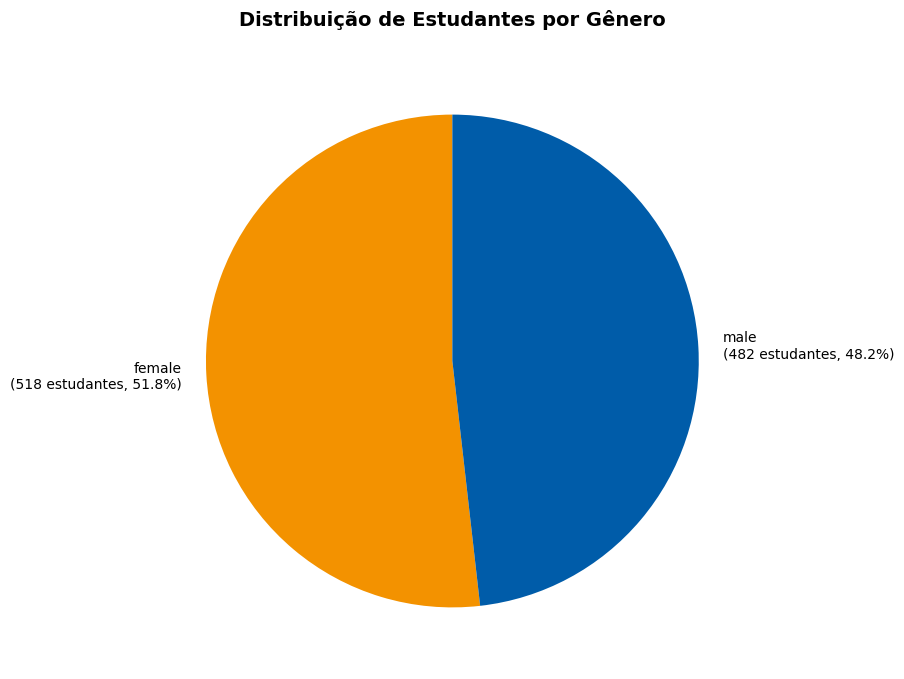

In [ ]:
import matplotlib.pyplot as plt

# Contagem por gênero
contagem = {}
for aluno in dados:
    genero = aluno['gender']
    contagem[genero] = contagem.get(genero, 0) + 1

# Dados
generos = list(contagem.keys())
quantidades = list(contagem.values())
total = sum(quantidades)

# Criar labels com % e números absolutos
labels = [f'{genero}\n({qtd} estudantes, {qtd/total*100:.1f}%)'
          for genero, qtd in zip(generos, quantidades)]

# Gráfico
plt.figure(figsize=(8, 8))
plt.pie(quantidades, labels=labels, colors=['#F39200','#005CA9'], startangle=90)
plt.title('Distribuição de Estudantes por Gênero', size=14, weight='bold', pad=20)
plt.show()

In [ ]:
# Média das notas de matemática por gênero
medias = {}
contagens = {}

for aluno in dados:
    genero = aluno['gender']
    nota_math = aluno['math score']

    # Converter para número, ignorando valores inválidos
    try:
        nota = int(nota_math)
        if genero not in medias:
            medias[genero] = 0
            contagens[genero] = 0

        medias[genero] += nota
        contagens[genero] += 1
    except (ValueError, TypeError):
        continue

# Calcular as médias finais
print("Média das notas de Matemática por Gênero:")
for genero in medias:
    media = medias[genero] / contagens[genero]
    print(f"{genero}: {media:.2f} pontos")

Média das notas de Matemática por Gênero:
female: 63.63 pontos
male: 68.73 pontos


In [ ]:
# Média das notas de leitura por gênero
medias = {}
contagens = {}

for aluno in dados:
    genero = aluno['gender']
    nota_math = aluno['reading score']

    # Converter para número, ignorando valores inválidos
    try:
        nota = int(nota_math)
        if genero not in medias:
            medias[genero] = 0
            contagens[genero] = 0

        medias[genero] += nota
        contagens[genero] += 1
    except (ValueError, TypeError):
        continue

# Calcular as médias finais
print("Média das notas de Leitura por Gênero:")
for genero in medias:
    media = medias[genero] / contagens[genero]
    print(f"{genero}: {media:.2f} pontos")

Média das notas de Leitura por Gênero:
female: 72.61 pontos
male: 65.47 pontos


In [ ]:
# Média das notas de redação por gênero
medias = {}
contagens = {}

for aluno in dados:
    genero = aluno['gender']
    nota_math = aluno['writing score']

    # Converter para número, ignorando valores inválidos
    try:
        nota = int(nota_math)
        if genero not in medias:
            medias[genero] = 0
            contagens[genero] = 0

        medias[genero] += nota
        contagens[genero] += 1
    except (ValueError, TypeError):
        continue

# Calcular as médias finais
print("Média das notas de Redação por Gênero:")
for genero in medias:
    media = medias[genero] / contagens[genero]
    print(f"{genero}: {media:.2f} pontos")

Média das notas de Redação por Gênero:
female: 72.47 pontos
male: 63.31 pontos


As mulheres possuem uma clara vantagem em relação aos homens quando se trata de dsiciplinas de linguagens, porém os homens possuem uma nota um pouco maior quando se trata de matemática, podemos ainda realizar um teste para identificar se essa diferença é significativa a nível de 5% de confiança

In [ ]:
from scipy import stats
import numpy as np

# Separar as notas de matemática por gênero
notas_female = []
notas_male = []

for aluno in dados:
    try:
        genero = aluno['gender']
        nota = int(aluno['math score'])
        if genero == 'female':
            notas_female.append(nota)
        elif genero == 'male':
            notas_male.append(nota)
    except (ValueError, TypeError):
        continue

# Teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(notas_male, notas_female, equal_var=False)
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 5.398000564160736
p-value: 8.420838109090415e-08


Considerando o esse p-valor podemos afirmar que sim há evidências que a diferença de médias de matemática entre gêneros é significativa.

Ainda trabalhando com gênero eu quero saber ainda qual como estão distribuidos o caso de educação dos pais de meninas e meninos, então eu vou fazer um filtro para filtrar apenas meninas e depois um para filtrar apenas meninos e verificar a distribuição de educação dos pais


In [ ]:
# Ordem hierárquica
ordem_educacao = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]



In [ ]:
from collections import Counter

In [ ]:
meninos = filter(lambda x: x['gender'] == 'male', dados)
meninos = list (meninos)
# Contagem na ordem correta
contagem = Counter(aluno['parental level of education'] for aluno in meninos)
quantidades = [contagem[edu] for edu in ordem_educacao]


In [ ]:
print("Distribuição por Educação dos Pais (Ordem Crescente) para Meninos:")
for educacao in ordem_educacao:
    if educacao in contagem:
        qtd = contagem[educacao]
        pct = (qtd / len(meninos)) * 100
        print(f"• {educacao}: {qtd} estudantes ({pct:.1f}%)")


Distribuição por Educação dos Pais (Ordem Crescente):
• some high school: 88 estudantes (18.3%)
• high school: 102 estudantes (21.2%)
• some college: 108 estudantes (22.4%)
• associate's degree: 106 estudantes (22.0%)
• bachelor's degree: 55 estudantes (11.4%)
• master's degree: 23 estudantes (4.8%)


In [ ]:
meninas = filter(lambda x: x['gender'] == 'female', dados)
meninas = list (meninas)
# Contagem na ordem correta
contagem = Counter(aluno['parental level of education'] for aluno in meninas)
quantidades = [contagem[edu] for edu in ordem_educacao]

print("Distribuição por Educação dos Pais (Ordem Crescente) para Meninas:")
for educacao in ordem_educacao:
    if educacao in contagem:
        qtd = contagem[educacao]
        pct = (qtd / len(meninas)) * 100
        print(f"• {educacao}: {qtd} estudantes ({pct:.1f}%)")


Distribuição por Educação dos Pais (Ordem Crescente) para Meninas:
• some high school: 91 estudantes (17.6%)
• high school: 94 estudantes (18.1%)
• some college: 118 estudantes (22.8%)
• associate's degree: 116 estudantes (22.4%)
• bachelor's degree: 63 estudantes (12.2%)
• master's degree: 36 estudantes (6.9%)


De modo geral é tudo muito similhar ao da população em geral mesmo como veremos mais a frente

## Estudo por Etnia

In [ ]:
dados[0].keys()

dict_keys(['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score', 'student_id'])

In [ ]:
### Contagem por Etnia
grupos_etnicos = ["group A",
                  "group B",
                  "group C",
                  "group D",
                  "group E"]


contagem_etnia = Counter(aluno['race/ethnicity'] for aluno in dados)
quantidades = [contagem_etnia[etnia] for etnia in grupos_etnicos]


print("Distribuição por Etnia:")
for etnia in grupos_etnicos:
    if etnia in contagem_etnia:
        qtd = contagem_etnia[etnia]
        pct = (qtd / len(dados)) * 100
        print(f"• {etnia}: {qtd} estudantes ({pct:.1f}%)")


Distribuição por Etnia:
• group A: 89 estudantes (8.9%)
• group B: 190 estudantes (19.0%)
• group C: 319 estudantes (31.9%)
• group D: 262 estudantes (26.2%)
• group E: 140 estudantes (14.0%)


o Grupo A é o que tem menor representatividade nos dados enquanto o Grupo C é com maior

## Estudo a respeito da escolaridade dos pais

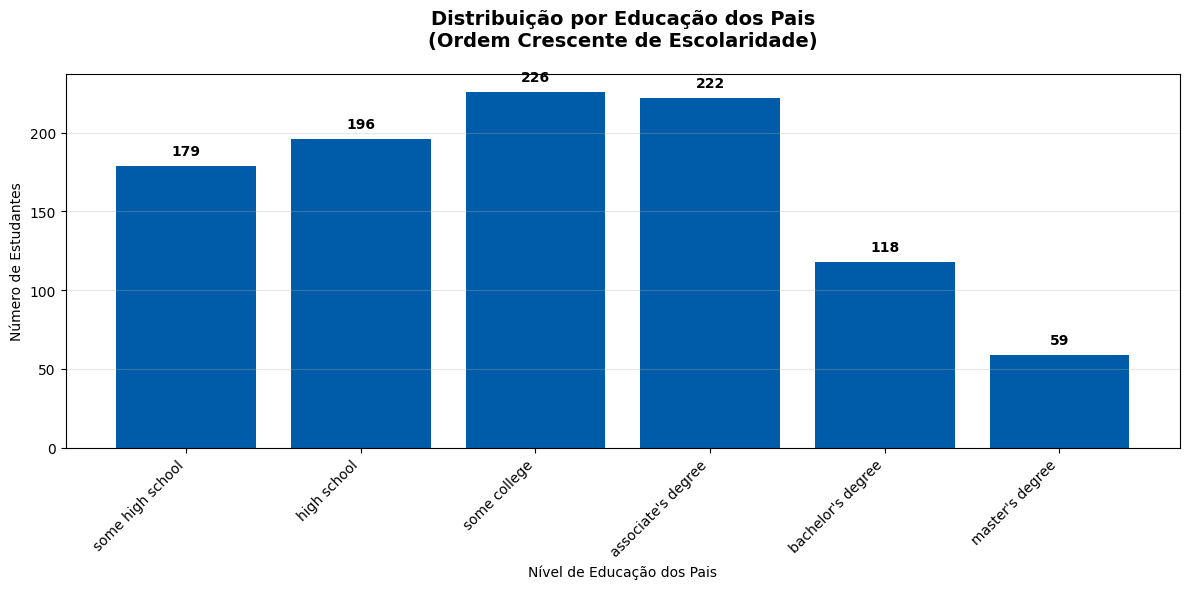

Distribuição por Educação dos Pais (Ordem Crescente):
• some high school: 179 estudantes (17.9%)
• high school: 196 estudantes (19.6%)
• some college: 226 estudantes (22.6%)
• associate's degree: 222 estudantes (22.2%)
• bachelor's degree: 118 estudantes (11.8%)
• master's degree: 59 estudantes (5.9%)


In [ ]:
# Ordem hierárquica
ordem_educacao = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

# Contagem na ordem correta
contagem = Counter(aluno['parental level of education'] for aluno in dados)
quantidades = [contagem[edu] for edu in ordem_educacao]

# Gráfico ordenado
plt.figure(figsize=(12, 6))
bars = plt.bar(ordem_educacao, quantidades, color='#005CA9')

# Adicionar valores
for bar, quantidade in zip(bars, quantidades):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
             f'{quantidade}', ha='center', va='bottom', fontweight='bold')

plt.title('Distribuição por Educação dos Pais\n(Ordem Crescente de Escolaridade)',
          size=14, weight='bold', pad=20)
plt.xlabel('Nível de Educação dos Pais')
plt.ylabel('Número de Estudantes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Console ordenado
print("Distribuição por Educação dos Pais (Ordem Crescente):")
print("=" * 60)
for educacao in ordem_educacao:
    if educacao in contagem:
        qtd = contagem[educacao]
        pct = (qtd / len(dados)) * 100
        print(f"• {educacao}: {qtd} estudantes ({pct:.1f}%)")


Vamos fazer uma investigaçãos se as notas dos alunos sofrem diferença para diferentes escolaridades dos pais para questão de matemática

/tmp/ipython-input-3195970903.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_math, x='parental_education', y='math_score',
/tmp/ipython-input-3195970903.py:34: UserWarning: 
The palette list has fewer values (1) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df_math, x='parental_education', y='math_score',
/tmp/ipython-input-3195970903.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medias = df_math.groupby('parental_education')['math_score'].mean()


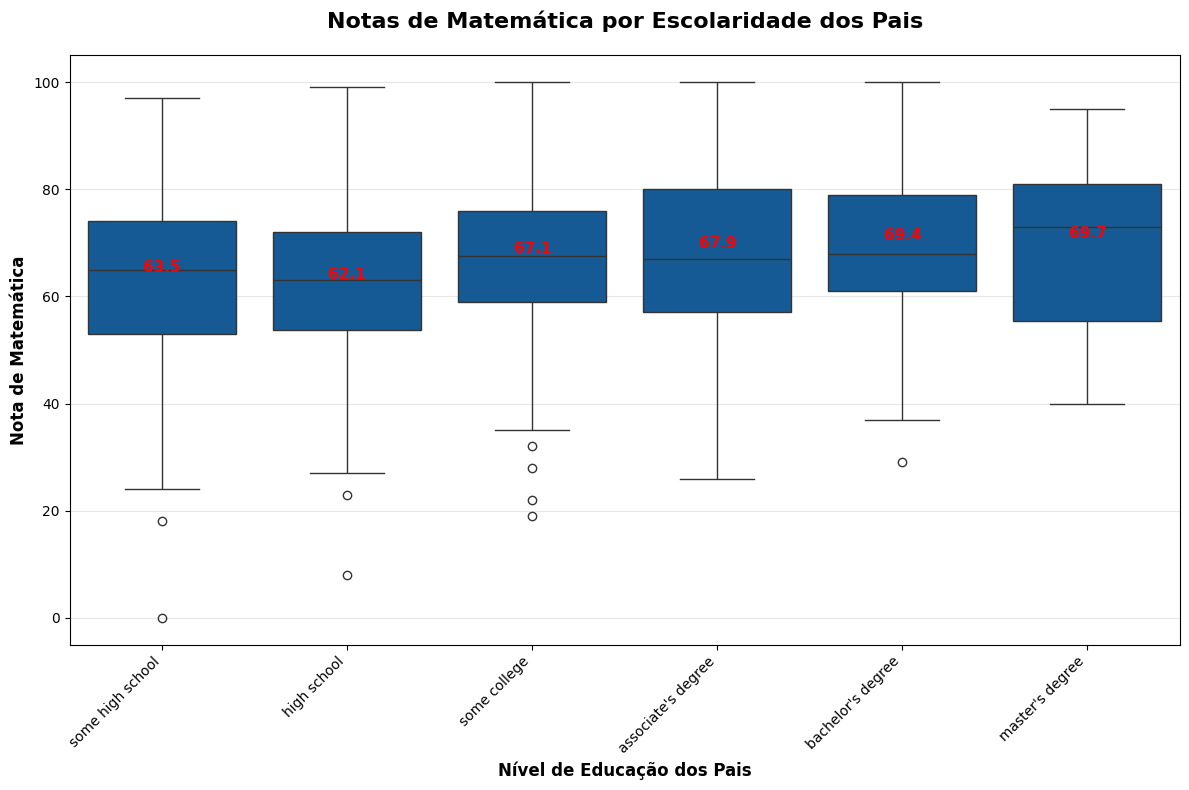


ESTATÍSTICAS DESCRITIVAS - MATEMÁTICA POR ESCOLARIDADE DOS PAIS
                    count   mean    std  min  max
parental_education                               
some high school      179  63.50  15.93    0   97
high school           196  62.14  14.54    8   99
some college          226  67.13  14.31   19  100
associate's degree    222  67.88  15.11   26  100
bachelor's degree     118  69.39  14.94   29  100
master's degree        59  69.75  15.15   40   95


/tmp/ipython-input-3195970903.py:57: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats = df_math.groupby('parental_education')['math_score'].agg(['count', 'mean', 'std', 'min', 'max'])


In [ ]:
import seaborn as sns
import pandas as pd

# Preparar dados para seaborn
dados_math = []
for aluno in dados:
    try:
        educacao = aluno['parental level of education']
        nota = int(aluno['math score'])
        dados_math.append({'parental_education': educacao, 'math_score': nota})
    except (ValueError, TypeError):
        continue

df_math = pd.DataFrame(dados_math)

# Ordenar o DataFrame pela hierarquia educacional
ordem_educacao = [
    'some high school',
    'high school',
    'some college',
    "associate's degree",
    "bachelor's degree",
    "master's degree"
]

df_math['parental_education'] = pd.Categorical(
    df_math['parental_education'],
    categories=ordem_educacao,
    ordered=True
)

# Criar boxplot com seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_math, x='parental_education', y='math_score',
            palette=['#005CA9'])

plt.title('Notas de Matemática por Escolaridade dos Pais',
          size=16, weight='bold', pad=20)
plt.xlabel('Nível de Educação dos Pais', size=12, weight='bold')
plt.ylabel('Nota de Matemática', size=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Adicionar médias no gráfico
medias = df_math.groupby('parental_education')['math_score'].mean()
for i, (educacao, media) in enumerate(medias.items()):
    plt.text(i, media + 0.5, f'{media:.1f}',
             ha='center', va='bottom', fontsize=11, weight='bold', color='red')

plt.tight_layout()
plt.show()

# Mostrar estatísticas descritivas
print("\n" + "="*60)
print("ESTATÍSTICAS DESCRITIVAS - MATEMÁTICA POR ESCOLARIDADE DOS PAIS")
print("="*60)
stats = df_math.groupby('parental_education')['math_score'].agg(['count', 'mean', 'std', 'min', 'max'])
print(stats.round(2))

## Estudo por alunos que fizeram preparação para o test ou não


ANÁLISE ESTATÍSTICA DETALHADA

MÉDIAS POR MATÉRIA E PREPARAÇÃO:

MATEMÁTICA:
             count   mean    std  min  max
preparation                               
completed      358  69.70  14.44   23  100
none           642  64.08  15.19    0  100

LEITURA:
             count   mean    std  min  max
preparation                               
completed      358  73.89  13.64   37  100
none           642  66.53  14.46   17  100

ESCRITA:
             count   mean    std  min  max
preparation                               
completed      358  74.42  13.38   36  100
none           642  64.50  15.00   10  100

TESTE DE DIFERENÇA DE MÉDIAS (completou vs não completou)

MATH SCORE:
  Diferença de médias: 5.62
  t-statistic: 5.7870
  p-value: 0.000000
SIGNIFICATIVO (p < 0.05)

READING SCORE:
  Diferença de médias: 7.36
  t-statistic: 8.0041
  p-value: 0.000000
SIGNIFICATIVO (p < 0.05)

WRITING SCORE:
  Diferença de médias: 9.91
  t-statistic: 10.7525
  p-value: 0.000000
SIGNIFICATIVO (p < 0.

/tmp/ipython-input-2171616436.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(dados_plot, labels=['Não', 'Sim'], patch_artist=True)
/tmp/ipython-input-2171616436.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(dados_plot, labels=['Não', 'Sim'], patch_artist=True)
/tmp/ipython-input-2171616436.py:76: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = axes[i].boxplot(dados_plot, labels=['Não', 'Sim'], patch_artist=True)


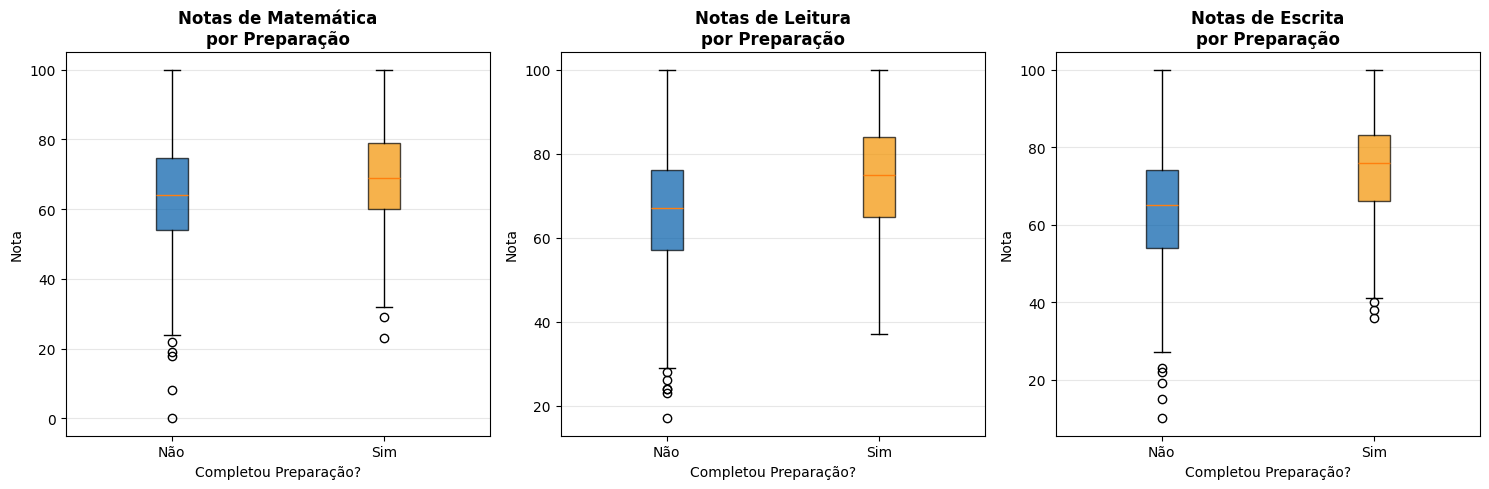

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Análise estatística mais detalhada
print("\n" + "="*60)
print("ANÁLISE ESTATÍSTICA DETALHADA")
print("="*60)

# Preparar dados para análise
dados_prep = []
for aluno in dados:
    try:
        prep = aluno['test preparation course']
        nota_math = int(aluno['math score'])
        nota_reading = int(aluno['reading score'])
        nota_writing = int(aluno['writing score'])
        dados_prep.append({
            'preparation': prep,
            'math_score': nota_math,
            'reading_score': nota_reading,
            'writing_score': nota_writing
        })
    except (ValueError, TypeError):
        continue

df_prep = pd.DataFrame(dados_prep)

# Estatísticas descritivas por matéria
print("\nMÉDIAS POR MATÉRIA E PREPARAÇÃO:")
stats_math = df_prep.groupby('preparation')['math_score'].agg(['count', 'mean', 'std', 'min', 'max'])
stats_reading = df_prep.groupby('preparation')['reading_score'].agg(['count', 'mean', 'std', 'min', 'max'])
stats_writing = df_prep.groupby('preparation')['writing_score'].agg(['count', 'mean', 'std', 'min', 'max'])

print("\nMATEMÁTICA:")
print(stats_math.round(2))
print("\nLEITURA:")
print(stats_reading.round(2))
print("\nESCRITA:")
print(stats_writing.round(2))

# Teste de diferença de médias
from scipy import stats

print("\n" + "="*60)
print("TESTE DE DIFERENÇA DE MÉDIAS (completou vs não completou)")
print("="*60)

# Separar grupos
grupo_none = df_prep[df_prep['preparation'] == 'none']
grupo_completed = df_prep[df_prep['preparation'] == 'completed']

# Teste t para cada matéria
materias = ['math_score', 'reading_score', 'writing_score']
for materia in materias:
    t_stat, p_value = stats.ttest_ind(grupo_completed[materia], grupo_none[materia], equal_var=False)
    diff_media = grupo_completed[materia].mean() - grupo_none[materia].mean()

    print(f"\n{materia.upper().replace('_', ' ')}:")
    print(f"  Diferença de médias: {diff_media:.2f}")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.6f}")
    if p_value < 0.05:
        print(f"SIGNIFICATIVO (p < 0.05)")
    else:
        print(f"NÃO SIGNIFICATIVO (p ≥ 0.05)")

# Gráfico comparativo para as três matérias
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
materias = ['math_score', 'reading_score', 'writing_score']
titulos = ['Matemática', 'Leitura', 'Escrita']
cores = ['#005CA9', '#F39200']

for i, (materia, titulo) in enumerate(zip(materias, titulos)):
    dados_plot = [grupo_none[materia], grupo_completed[materia]]
    box = axes[i].boxplot(dados_plot, labels=['Não', 'Sim'], patch_artist=True)

    for patch, color in zip(box['boxes'], cores):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)

    axes[i].set_title(f'Notas de {titulo}\npor Preparação', weight='bold')
    axes[i].set_xlabel('Completou Preparação?')
    axes[i].set_ylabel('Nota')
    axes[i].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()